<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [17]:
sac_csv = '../data/sacramento_real_estate_transactions.csv'

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats


shd = pd.read_csv(sac_csv)
shd.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [19]:
# A:# Check the dtypes
shd.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [20]:
shd['zip'] = shd['zip'].astype(str)

In [21]:
# Check out the summary statistics:
shd.describe()

,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [22]:
# Check out the cities. Most cities with very few observations.
shd.city.value_counts()

SACRAMENTO         439
ELK GROVE          114
LINCOLN             72
ROSEVILLE           48
CITRUS HEIGHTS      35
ANTELOPE            33
RANCHO CORDOVA      28
EL DORADO HILLS     23
GALT                21
NORTH HIGHLANDS     21
CARMICHAEL          20
FOLSOM              17
ROCKLIN             17
RIO LINDA           13
ORANGEVALE          11
PLACERVILLE         10
CAMERON PARK         9
FAIR OAKS            9
WILTON               5
AUBURN               5
GOLD RIVER           4
ELVERTA              4
WEST SACRAMENTO      3
RANCHO MURIETA       3
POLLOCK PINES        3
GRANITE BAY          3
LOOMIS               2
EL DORADO            2
MATHER               1
PENRYN               1
MEADOW VISTA         1
FORESTHILL           1
DIAMOND SPRINGS      1
SHINGLE SPRINGS      1
COOL                 1
WALNUT GROVE         1
GARDEN VALLEY        1
SLOUGHHOUSE          1
GREENWOOD            1
Name: city, dtype: int64

In [23]:
shd[shd['beds'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
901,1530 TOPANGA LN Unit 204,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,138000,38.884150,-121.270277
917,501 POPLAR AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,165000,38.584526,-121.534609
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539


In [24]:
print(shd[shd['beds'] == 0].shape)

(108, 12)


In [25]:
shd[shd['price'] < 1]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [26]:
shd[shd['sq__ft'] < 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [29]:
shd[shd['state'] != 'CA']

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude


In [28]:

shd.drop(703, inplace = True)

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a SLR model. 

**For each of these variables you believe to be valid potential predictors in an SLR model, generate a plot showing the relationship between the independent variable and dependent variable.**

In [31]:
# the most common variables when determining house price tend to be beds, baths
# and square ft

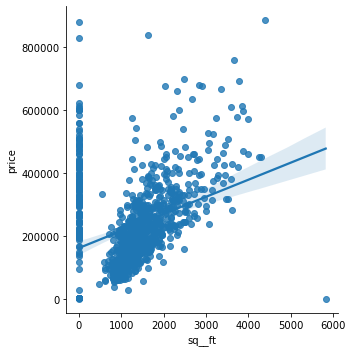

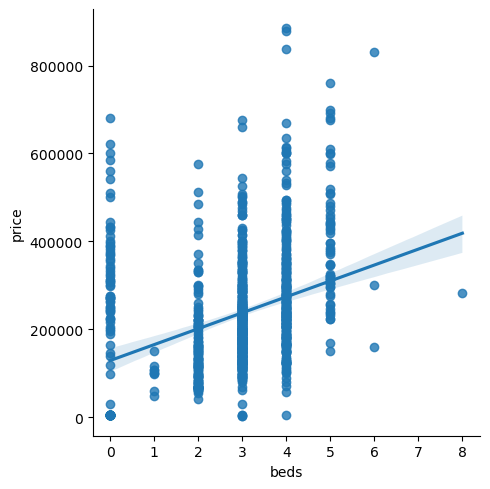

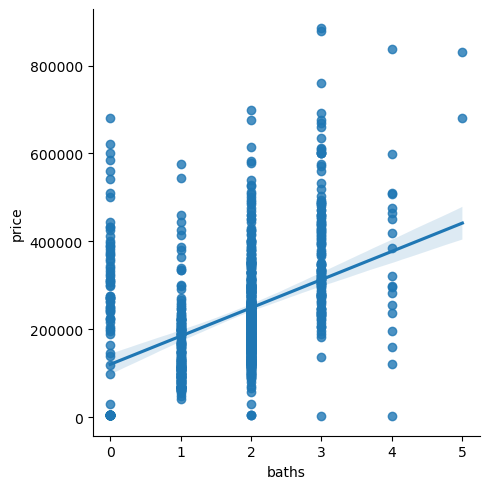

In [32]:
sns.lmplot(x='sq__ft', y='price', data=shd)
plt.show()
sns.lmplot(x='beds', y='price', data=shd)
plt.show()
sns.lmplot(x='baths', y='price', data=shd)
plt.show()

In [36]:
#per the solutions book, saving the clean dataset so far 
shd.to_csv('../data/sacramento_real_estate_transactions_Clean.csv')

### 4. Which variable would be the best predictor of Y in a SLR model? Why?

In [37]:
# A: Sq feet seems to be a better predictor, but still need to clean up some
# more data to eliminate the instances where we have houses with 0 sq ft, 0 beds
# and 0 bathrooms still with a quoted price, as that is moving the mean price up

In [40]:
print(shd[shd['beds'] == 0])

                       street             city    zip state  beds  baths  \
73              17 SERASPI CT       SACRAMENTO  95834    CA     0      0   
89           2866 KARITSA AVE       SACRAMENTO  95833    CA     0      0   
100     12209 CONSERVANCY WAY   RANCHO CORDOVA  95742    CA     0      0   
121       5337 DUSTY ROSE WAY   RANCHO CORDOVA  95742    CA     0      0   
126       2115 SMOKESTACK WAY       SACRAMENTO  95833    CA     0      0   
..                        ...              ...    ...   ...   ...    ...   
901  1530 TOPANGA LN Unit 204          LINCOLN  95648    CA     0      0   
917            501 POPLAR AVE  WEST SACRAMENTO  95691    CA     0      0   
934  1550 TOPANGA LN Unit 207          LINCOLN  95648    CA     0      0   
947     1525 PENNSYLVANIA AVE  WEST SACRAMENTO  95691    CA     0      0   
970             3557 SODA WAY       SACRAMENTO  95834    CA     0      0   

     sq__ft         type                     sale_date   price   latitude  \
73        

In [41]:
print(shd[shd['sq__ft'] == 0])

                       street             city    zip state  beds  baths  \
73              17 SERASPI CT       SACRAMENTO  95834    CA     0      0   
89           2866 KARITSA AVE       SACRAMENTO  95833    CA     0      0   
100     12209 CONSERVANCY WAY   RANCHO CORDOVA  95742    CA     0      0   
121       5337 DUSTY ROSE WAY   RANCHO CORDOVA  95742    CA     0      0   
126       2115 SMOKESTACK WAY       SACRAMENTO  95833    CA     0      0   
..                        ...              ...    ...   ...   ...    ...   
934  1550 TOPANGA LN Unit 207          LINCOLN  95648    CA     0      0   
947     1525 PENNSYLVANIA AVE  WEST SACRAMENTO  95691    CA     0      0   
966          9197 CORTINA CIR        ROSEVILLE  95678    CA     3      2   
970             3557 SODA WAY       SACRAMENTO  95834    CA     0      0   
973      2181 WINTERHAVEN CIR     CAMERON PARK  95682    CA     3      2   

     sq__ft         type                     sale_date   price   latitude  \
73        

In [42]:
print(shd[shd['baths'] == 0])

                       street             city    zip state  beds  baths  \
73              17 SERASPI CT       SACRAMENTO  95834    CA     0      0   
89           2866 KARITSA AVE       SACRAMENTO  95833    CA     0      0   
100     12209 CONSERVANCY WAY   RANCHO CORDOVA  95742    CA     0      0   
121       5337 DUSTY ROSE WAY   RANCHO CORDOVA  95742    CA     0      0   
126       2115 SMOKESTACK WAY       SACRAMENTO  95833    CA     0      0   
..                        ...              ...    ...   ...   ...    ...   
901  1530 TOPANGA LN Unit 204          LINCOLN  95648    CA     0      0   
917            501 POPLAR AVE  WEST SACRAMENTO  95691    CA     0      0   
934  1550 TOPANGA LN Unit 207          LINCOLN  95648    CA     0      0   
947     1525 PENNSYLVANIA AVE  WEST SACRAMENTO  95691    CA     0      0   
970             3557 SODA WAY       SACRAMENTO  95834    CA     0      0   

     sq__ft         type                     sale_date   price   latitude  \
73        

In [ ]:
# we are going to drop all these three instances where we might have invalidad
# data to cleanup our dataset

In [47]:
# First the ones where there are no bedrooms (which might be the same instance
# of the ones that don't have bathrooms as the shape is the same).
shd.drop(shd[shd['beds'] == 0].index, inplace = True)

In [51]:
# let's verify if we still have data with 0 beds
print(shd[shd['beds'] == 0])

Empty DataFrame
Columns: [street, city, zip, state, beds, baths, sq__ft, type, sale_date, price, latitude, longitude]
Index: []


In [53]:
# Do we still have data with 0 bathrooms?
print(shd[shd['baths'] == 0])

Empty DataFrame
Columns: [street, city, zip, state, beds, baths, sq__ft, type, sale_date, price, latitude, longitude]
Index: []


In [55]:
# Do we still have data with 0 sq ft?
print(shd[shd['sq__ft'] == 0])

                                 street             city    zip state  beds  \
132                 3020 RICHARDSON CIR  EL DORADO HILLS  95762    CA     3   
154                    6030 PALERMO WAY  EL DORADO HILLS  95762    CA     4   
155                     4070 REDONDO DR  EL DORADO HILLS  95762    CA     4   
157                        315 JUMEL CT  EL DORADO HILLS  95762    CA     6   
223                      2778 KAWEAH CT     CAMERON PARK  95682    CA     3   
..                                  ...              ...    ...   ...   ...   
863                    2982 ABERDEEN LN  EL DORADO HILLS  95762    CA     4   
865                3720 VISTA DE MADERA          LINCOLN  95648    CA     3   
922  10001 WOODCREEK OAKS BLVD Unit 815        ROSEVILLE  95747    CA     2   
966                    9197 CORTINA CIR        ROSEVILLE  95678    CA     3   
973                2181 WINTERHAVEN CIR     CAMERON PARK  95682    CA     3   

     baths  sq__ft         type                    

In [ ]:
# 63 rows, seems correct as we initially had 171 that also had 0 beds, 0 baths
# and 0 sq_ft. If we substract the 108 that we eliminated for having 0 beds, we
# are left with 63. 171-108=63
# Now let's eliminate the ones that have 0 sq_ft

In [56]:
shd.drop(shd[shd['sq__ft'] == 0].index, inplace = True)

In [57]:
# Do we still have data with 0 sq ft?
print(shd[shd['sq__ft'] == 0])

Empty DataFrame
Columns: [street, city, zip, state, beds, baths, sq__ft, type, sale_date, price, latitude, longitude]
Index: []


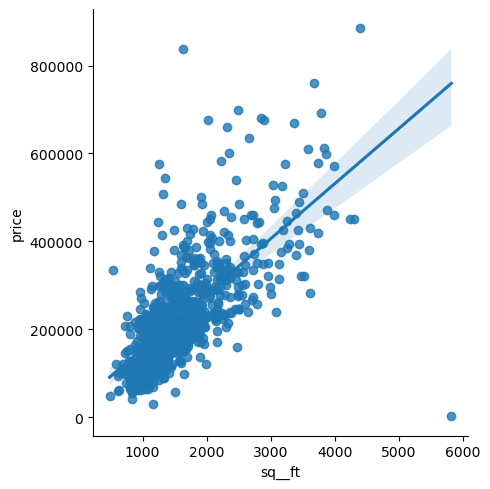

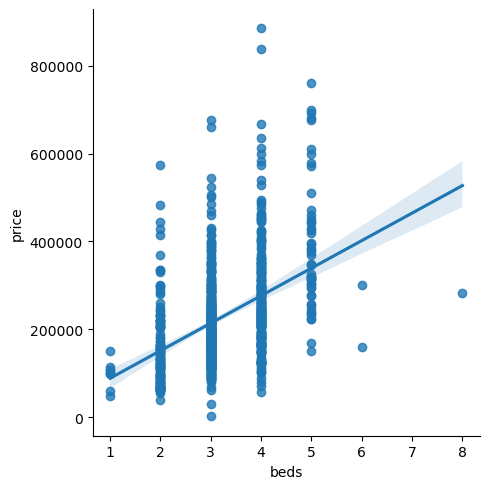

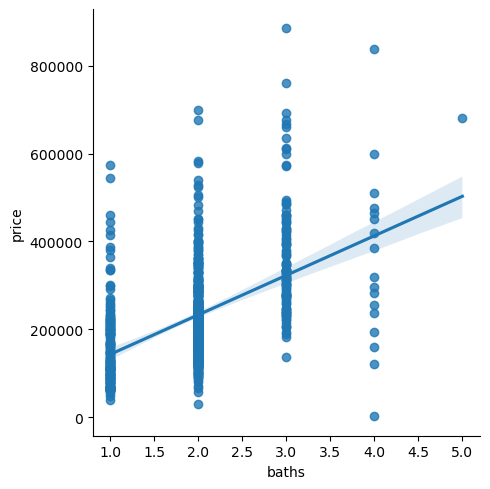

In [59]:
# let's re-plot
sns.lmplot(x='sq__ft', y='price', data=shd)
plt.show()
sns.lmplot(x='beds', y='price', data=shd)
plt.show()
sns.lmplot(x='baths', y='price', data=shd)
plt.show()

In [ ]:
# The distribution now seems closer to out tendency line for sq_ft

In [61]:
# Re-saving our cleaner dataset
shd.to_csv('../data/sacramento_real_estate_transactions_Clean.csv')

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [62]:
# Based on the class examples, 
# Get the optimal Slope and y intercept

def lin_reg(x,y):
    # Using other libraries for standard Deviation and Pearson Correlation Coef.
    # Note that in SLR, the correlation coefficient multiplied by the standard
    # deviation of y divided by standard deviation of x is the optimal slope.
    beta_1 = (scipy.stats.pearsonr(x,y)[0])*(np.std(y)/np.std(x))
    
    # Pearson Co. Coef returns a tuple so it needs to be sliced/indexed
    # the optimal beta is found by: mean(y) - b1 * mean(x)
    beta_0 = np.mean(y)-(beta_1*np.mean(x)) 
    
    #Print the Optimal Values
    print('The Optimal Y Intercept is ', beta_0)
    print('The Optimal slope is ', beta_1)

In [63]:
x = shd['sq__ft'].values
y = shd['price'].values
lin_reg(x,y)

The Optimal Y Intercept is  29984.36172651971
The Optimal slope is  125.31418257510146


### 6. Interpret the intercept. Interpret the slope.

In [64]:
# A: The intercept is our starting point for the values of our function,
# in this case 'y'. To put it in terms specific to this dataset, it's the minimum
# value for a plot of land with no added perks other than the extension that
# it has.
# If we didn't have an intercept our function could start from 0 (the origin),
# and in practice we know that there are no properties with 0 value.

# The Slope represents how much our target variable increases every time that 
# our predictor also increates, in this case, how much the price increases
# per sq_ft unit increases.

### 7. Give an example of how this model could be used for prediction and how this model could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [8]:
# A: We can use the model to "predict" the price that a house might sell for
# if we have a dataset where we can extract some of the characteristics that 
# our model uses.
# Or we can use the model to "infer" what attributes we can devote more resources
# when deciding to build a house for investment purposes, as we know which 
# characteristics have more perceived value and might impact the final price more.

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [65]:
# Used the solution for this, only updated with my model
# intercept and slope.
# predictor: y = 29984.36 + 125.31x
# Creating a list of predicted values
y_pred = []

for x in shd['sq__ft']:
    y = 29984.36 + (125.31*x)
    y_pred.append(y)

In [66]:
# Appending the predicted values to the Sacramento housing dataframe to do DF calcs
shd['Pred'] = y_pred

# Residuals equals the difference between Y-True and Y-Pred
shd['Residuals'] = abs(shd['price']-shd['Pred'])

In [67]:
shd['Residuals'].mean()
# the mean of our residuals is aproximately $96,000, which means that is
# on average how off our prediction is.

60221.80045510455

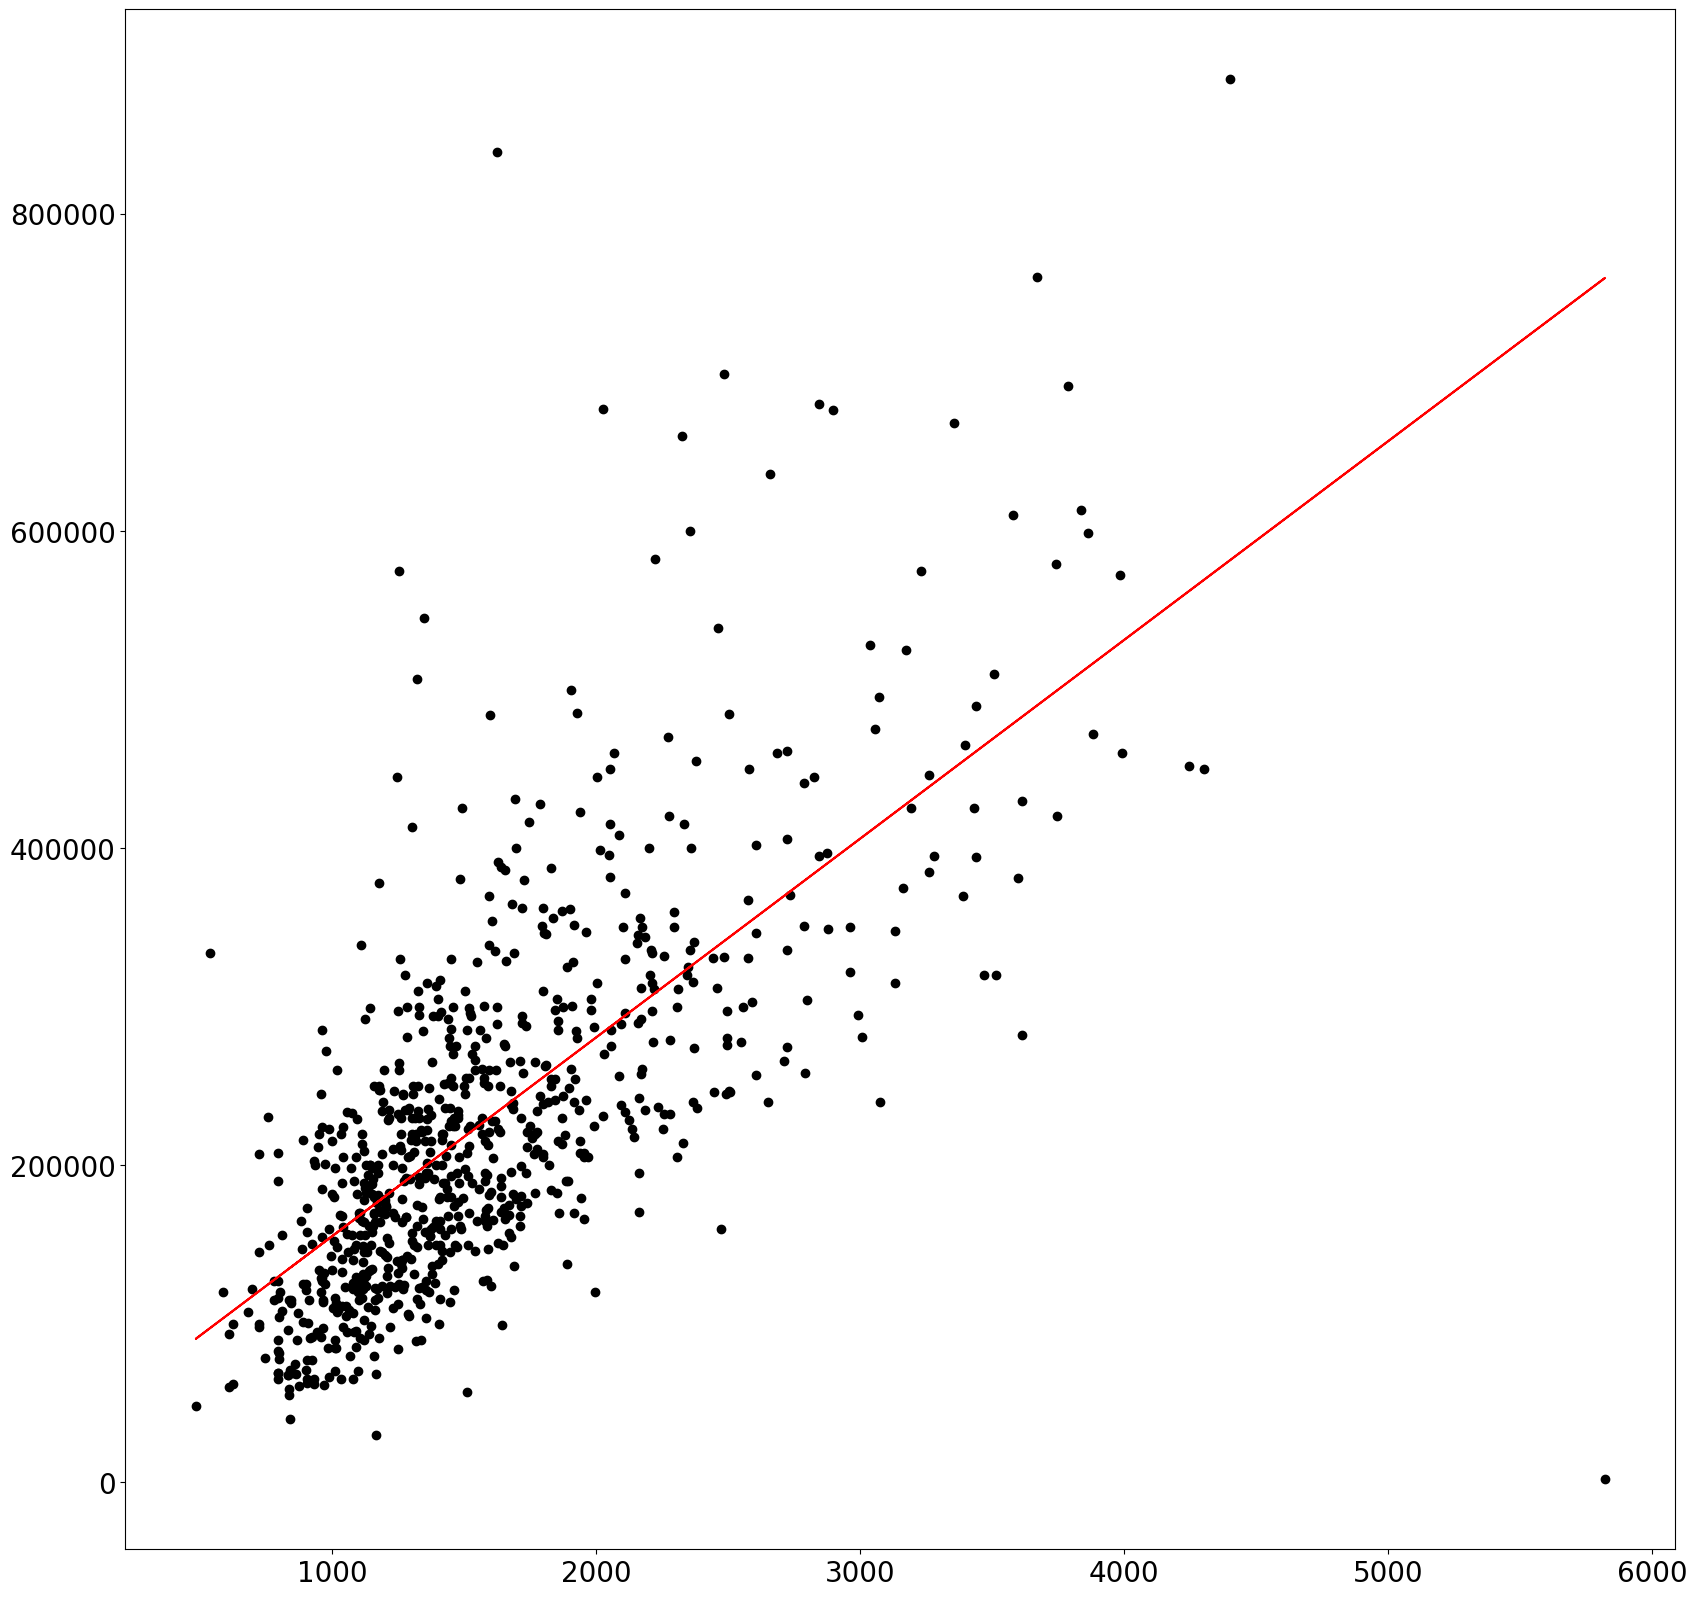

In [68]:
# Plot showing out linear forcast
fig = plt.figure(figsize=(20,20))

# change the fontsize of minor ticks label
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=20)

# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(x= shd['sq__ft'], y=shd['price'], c='k')
ax.plot(shd['sq__ft'], shd['Pred'], color='r');

In [ ]:
# Compared to the solutions, this one doesn't have any outliers aligned to 0

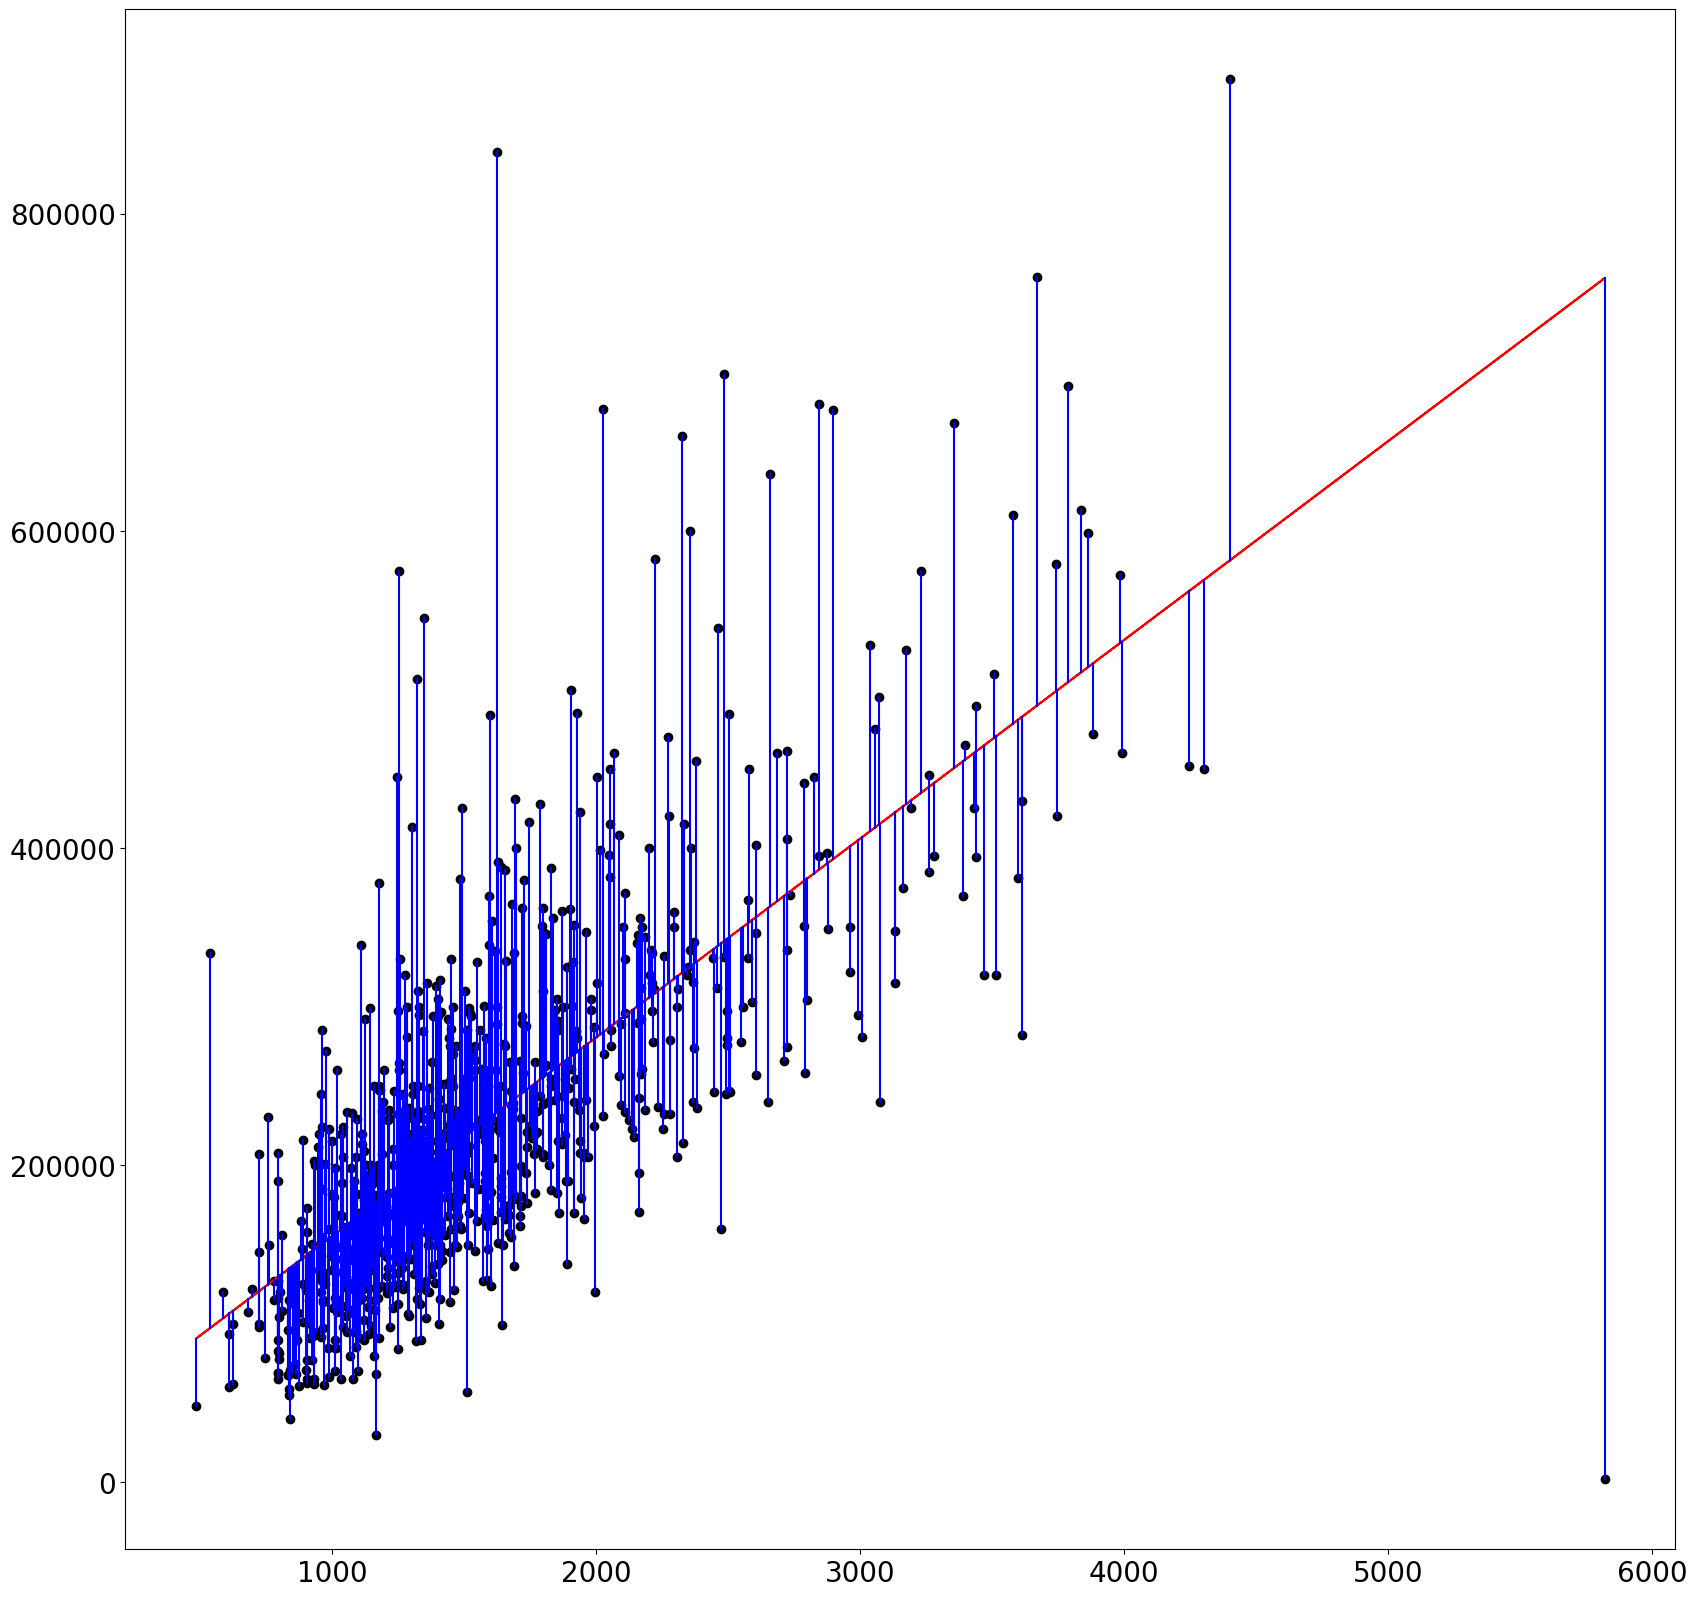

In [69]:
# Plot with residuals
fig = plt.figure(figsize=(20,20))

# change the fontsize of minor ticks label
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=20)

# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(x= shd['sq__ft'], y=shd['price'], c='k')
ax.plot(shd['sq__ft'], shd['Pred'], color='r');

# iterate over predictions
for _, row in shd.iterrows():
    plt.plot((row['sq__ft'], row['sq__ft']), (row['price'], row['Pred']), 'b-')

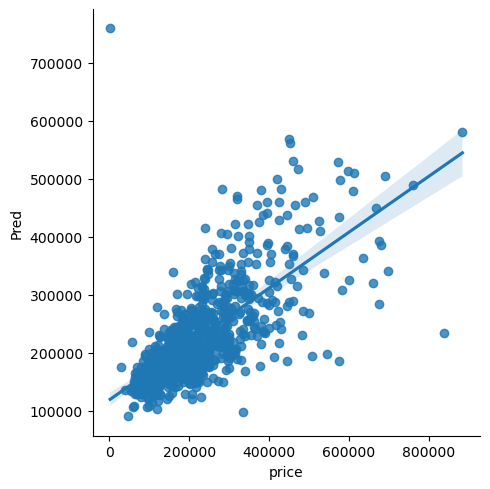

In [70]:
# One more plot, Lets look how our Predictions compared to the true values.
sns.lmplot(x='price', y='Pred', data=shd)

In [71]:
# There are far fewer points plotted close to our intercept (29984.36) as we 
# eliminated the rows with sq ft == 0. 
# We still have a couple of outliers (like the predicted over $700k one), but
# the plot looks much better than what the solutions book has.